In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from google.colab import files
data = files.upload()

Saving balanced_dataset.csv to balanced_dataset.csv


In [ ]:
df = pd.read_csv("balanced_dataset.csv")

In [ ]:
df

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
0,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
1,1,2,28.020000,28.020000,56.040000,28.020000,14.010000,0
2,1,1,21.926000,21.916000,43.842000,21.926000,21.916000,0
3,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
4,0,0,178.306508,27.711686,206.018195,178.306508,27.711686,1
...,...,...,...,...,...,...,...,...
200157,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
200158,0,0,299.564377,12.554453,312.118829,299.564377,12.554453,1
200159,0,1,0.000000,50.000000,50.000000,0.000000,50.000000,1
200160,1,0,246.366265,21.947676,268.313941,246.366265,10.973838,1


In [ ]:
X = df.drop(["out_and_tx_malicious"], axis=1)
y = df["out_and_tx_malicious"]


In [ ]:
y

0         1
1         0
2         0
3         1
4         1
         ..
200157    1
200158    1
200159    1
200160    1
200161    1
Name: out_and_tx_malicious, Length: 200162, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def create_feedforward_nn(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

base_model1 = create_feedforward_nn(X_train.shape[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_mlp(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

base_model2 = create_mlp(X_train.shape[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_lstm(input_shape, sequence_length):
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1],1), return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# You need to reshape your X_train and X_test to be sequences with the appropriate sequence_length.
sequence_length = 10  # Adjust as needed based on your data
base_model3 = create_lstm(input_shape=X_train.shape[1], sequence_length=sequence_length)

In [ ]:
base_model1 = KerasClassifier(build_fn=create_feedforward_nn, input_dim=X_train.shape[1], epochs=10, batch_size=32, verbose=0)

<ipython-input-21-a9e62dcfd0f7>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  base_model1 = KerasClassifier(build_fn=create_feedforward_nn, input_dim=X_train.shape[1], epochs=10, batch_size=32, verbose=0)


In [ ]:
base_model2 = KerasClassifier(build_fn=create_mlp, input_dim=X_train.shape[1], epochs=10, batch_size=32, verbose=0)

<ipython-input-22-ae957d56268d>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  base_model2 = KerasClassifier(build_fn=create_mlp, input_dim=X_train.shape[1], epochs=10, batch_size=32, verbose=0)


In [ ]:
base_model3 = KerasClassifier(build_fn=create_lstm, input_shape=(X_train.shape[1], 1), sequence_length=10, epochs=10, batch_size=32, verbose=0)


<ipython-input-31-2da6f2eb28cd>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  base_model3 = KerasClassifier(build_fn=create_lstm, input_shape=(X_train.shape[1], 1), sequence_length=10, epochs=10, batch_size=32, verbose=0)


In [ ]:
meta_model = LogisticRegression()

In [ ]:
stacking_model = StackingClassifier(estimators=[
    ('model1', base_model1),
    ('model2', base_model2),
    ('model3', base_model3)
], final_estimator=LogisticRegression())

In [ ]:
stacking_model.fit(X_train, y_train)

1001/1001 [==============================] - 3s 2ms/step


StackingClassifier(estimators=[('model1',
                                <keras.wrappers.scikit_learn.KerasClassifier object at 0x7b961df47130>),
                               ('model2',
                                <keras.wrappers.scikit_learn.KerasClassifier object at 0x7b961df46da0>),
                               ('model3',
                                <keras.wrappers.scikit_learn.KerasClassifier object at 0x7b95b10c6e60>)],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred = stacking_model.predict(X_test)

1252/1252 [==============================] - 4s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ensemble model: {accuracy:.10f}")

Accuracy of the ensemble model: 0.9961531736


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision = precision_score(y_test,y_pred)
print("precision = ", precision)

precision =  0.994010182689428


In [ ]:
recall = recall_score(y_test,y_pred)
print("precision = ", recall)

precision =  0.9982955684780429


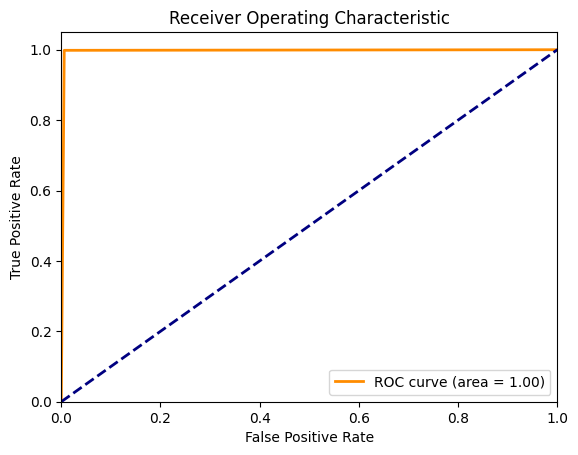

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have 'ypred' and 'test_labels' arrays
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

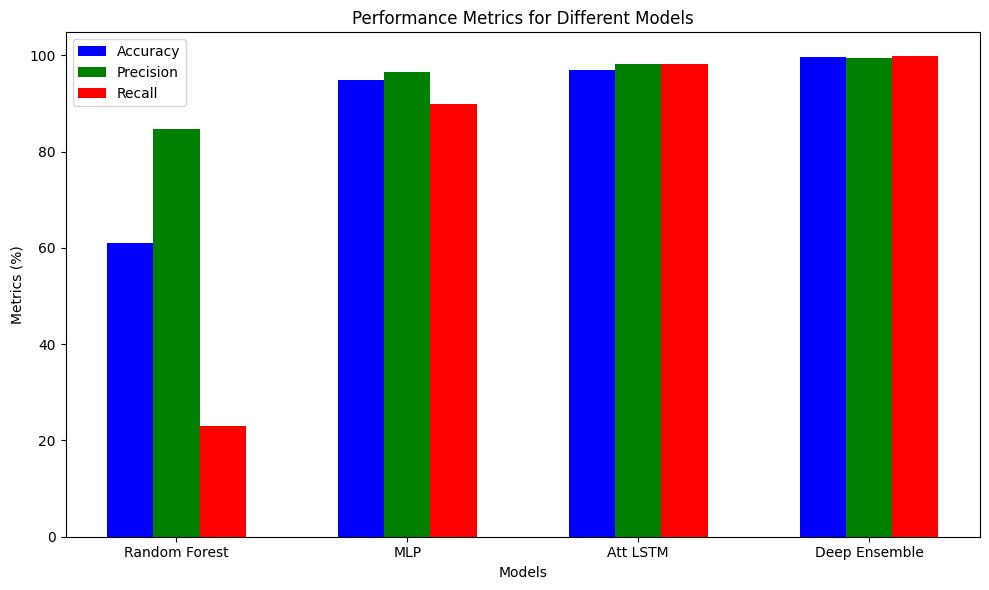

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding metrics
models = ['Random Forest', 'MLP', 'Att LSTM', 'Deep Ensemble']
accuracy = [61.00, 95.00, 97.00, 99.63]
precision = [84.63, 96.55, 98.26, 99.40]
recall = [23.08, 89.99, 98.24, 99.82]

# Create a bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(models))

plt.bar(index, accuracy, bar_width, label='Accuracy', color='b', align='center')
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision', color='g', align='center')
plt.bar([i + 2*bar_width for i in index], recall, bar_width, label='Recall', color='r', align='center')

# Set the labels and title
plt.xlabel('Models')
plt.ylabel('Metrics (%)')
plt.title('Performance Metrics for Different Models')
plt.xticks([i + bar_width for i in index], models)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()